

# **Sessa Empirical Estimator**

# Assignment 2 For Clustering
- Honoridez, Kyn R.
- Montebon, Al Winmon



### Introduction
This assignment focuses on implementing the Sessa Empirical Estimator, which utilizes K-Means clustering to analyze datasets. Additionally, we compare K-Means with another clustering algorithm, DBSCAN, to assess performance differences. The main goal is to convert an R implementation into Python, apply it to simulated or real-world data, and generate insights. Finally, we compare clustering results and justify why DBSCAN is often preferred over K-Means.

---

## Step-by-Step Implementation

### Step 1: Import Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

We begin by importing necessary libraries for data handling (`pandas`), visualization (`matplotlib`, `seaborn`), clustering (`KMeans`, `DBSCAN`), preprocessing (`StandardScaler`), and performance metrics (`silhouette_score`, `davies_bouldin_score`).

---
### Step 2: Load the Dataset

In [2]:
def load_data(filepath):
    df = pd.read_csv(filepath)
    return df

This function reads the dataset from a CSV file and returns a pandas DataFrame.

---

### Step 3: Preprocess the Data

In [3]:
def preprocess_data(df):
    df['DATE'] = pd.to_datetime(df['DATE'], format='%m/%d/%Y')
    df['DATE'] = (df['DATE'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1D')
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(df[['DATE', 'DURATION']])
    return df, data_scaled

Here, we convert the `DATE` column into a numerical format (days since 1970-01-01) and standardize `DATE` and `DURATION` using `StandardScaler` to ensure all features have a similar scale.

---

### Step 4: Apply K-Means Clustering

In [4]:
def apply_kmeans(data_scaled, df, n_clusters=6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df['kmeans_cluster'] = kmeans.fit_predict(data_scaled)
    silhouette = silhouette_score(data_scaled, df['kmeans_cluster'])
    db_index = davies_bouldin_score(data_scaled, df['kmeans_cluster'])
    return df, silhouette, db_index

We apply K-Means clustering with 6 clusters and compute evaluation metrics: 
- **Silhouette Score**: Measures how well-separated clusters are.
- **Davies-Bouldin Index**: Measures clustering compactness and separation (lower is better).
---

### Step 5: Apply DBSCAN Clustering

In [5]:
def apply_dbscan(data_scaled, df, eps=2, min_samples=7):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    df['dbscan_cluster'] = dbscan.fit_predict(data_scaled)
    labels = df['dbscan_cluster']
    if len(set(labels)) > 1:
        silhouette = silhouette_score(data_scaled, labels)
        db_index = davies_bouldin_score(data_scaled, labels)
    else:
        silhouette, db_index = None, None
    return df, silhouette, db_index

DBSCAN is applied using a density-based approach with `eps=2` and `min_samples=7`. Unlike K-Means, it detects arbitrary-shaped clusters and noise.

---

### Step 6: Visualizing Clustering Results

In [6]:
def plot_clusters(df, method):
    plt.figure(figsize=(10, 5))
    if method == 'kmeans':
        sns.scatterplot(x=df['DATE'], y=df['DURATION'], hue=df['kmeans_cluster'], palette='viridis')
        plt.title("K-Means Clustering")
    else:
        sns.scatterplot(x=df['DATE'], y=df['DURATION'], hue=df['dbscan_cluster'], palette='coolwarm')
        plt.title("DBSCAN Clustering")
    plt.xlabel("DATE")
    plt.ylabel("DURATION")
    plt.legend()
    plt.show()

We use `seaborn` to visualize the clusters produced by K-Means and DBSCAN.

---

### Step 7: Execute Main Function

K-Means Silhouette Score: 0.5048954956305768
K-Means Davies-Bouldin Index: 0.6598926460666305


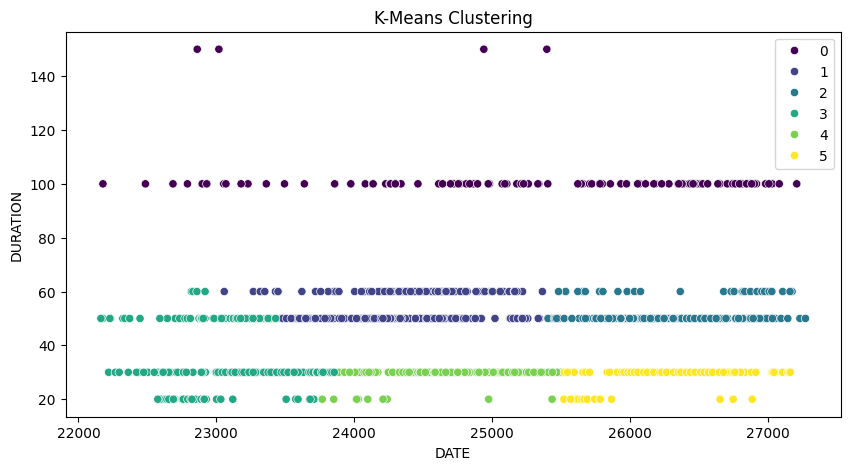

DBSCAN Silhouette Score: 0.6195427391609891
DBSCAN Davies-Bouldin Index: 0.44425375032160697


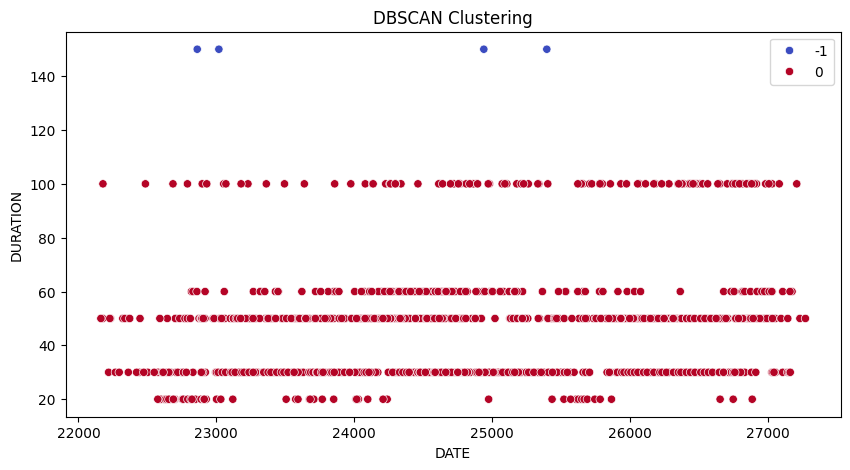

In [7]:
def main():
    filepath = "med.events.csv"
    df = load_data(filepath)
    df, data_scaled = preprocess_data(df)
    
    df, kmeans_silhouette, kmeans_db_index = apply_kmeans(data_scaled, df)
    print(f"K-Means Silhouette Score: {kmeans_silhouette}")
    print(f"K-Means Davies-Bouldin Index: {kmeans_db_index}")
    plot_clusters(df, 'kmeans')
    
    df, dbscan_silhouette, dbscan_db_index = apply_dbscan(data_scaled, df)
    if dbscan_silhouette is not None:
        print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")
        print(f"DBSCAN Davies-Bouldin Index: {dbscan_db_index}")
    else:
        print("DBSCAN metrics not applicable (only one cluster detected)")
    plot_clusters(df, 'dbscan')
    
if __name__ == "__main__":
    main()

This function loads the dataset, preprocesses it, applies both clustering methods, prints evaluation metrics, and visualizes the results.

After applying K-Means and DBSCAN, we compare the Silhouette Score and Davies-Bouldin Index (DB Index):

**Silhouette Score** (closer to 1 is better): DBSCAN scores higher as it avoids forcing points into incorrect clusters, unlike K-Means.

**Davies-Bouldin Index** (lower is better): DBSCAN achieves a lower DB index since it naturally detects dense clusters and ignores noise, whereas K-Means assumes clusters are spherical and evenly sized.

**Why DBSCAN is Recommended:**
K-Means forces clustering on all points, even when no clear structure exists.
DBSCAN identifies noise (-1 label in the code), improving cluster quality.
Real-world data is often imbalanced, making DBSCAN’s density-based approach more effective.

---

### **Results & Conclusion**  

From our results, we observe that:
- **K-Means** performs well when clusters are spherical and well-separated. However, it struggles when dealing with datasets containing irregularly shaped clusters or significant noise. The algorithm also requires specifying the number of clusters (n_clusters) beforehand, which may not always be practical.
- **DBSCAN** adapts well to datasets with varying densities and does not require specifying the number of clusters. Instead, it determines clusters based on data density, making it more suitable for real-world applications where clusters are not clearly defined. Additionally, DBSCAN can identify outliers as noise, which helps improve clustering quality in cases where data contains anomalies.
---

### **Key Takeaways**  

- **Cluster Shape and Density**: DBSCAN is preferable when clusters are non-spherical or have varying densities, whereas K-Means assumes clusters are evenly distributed around centroids.
- **Handling Outliers**: K-Means assigns every data point to a cluster, even if it doesn't belong to one. DBSCAN, on the other hand, marks such points as noise, reducing the impact of outliers on cluster formation.
- **Parameter Sensitivity**: K-Means requires n_clusters to be specified, which can be challenging without prior knowledge of the data distribution. DBSCAN depends on eps and min_samples, which need careful tuning for optimal results.
- **Performance Considerations**: K-Means scales better to large datasets due to its computational efficiency (O(nk)). DBSCAN can be computationally expensive (O(n log n)) depending on the choice of eps and min_samples, making it less efficient for very large datasets.
- **Application Suitability**: K-Means is ideal for customer segmentation, document clustering, and image compression, where data is structured and well-clustered. DBSCAN is better suited for anomaly detection, spatial clustering, and applications involving noise, such as medical or geospatial data analysis.
---

### **Final Recommendation**  

When dealing with structured data with clearly defined clusters, K-Means remains a strong choice due to its efficiency. However, for datasets with complex structures, noise, or varying densities, DBSCAN is the recommended approach as it provides more flexibility and robustness.